## Solar Panel Power Supply calibration using Fuzzy Logic

In [1]:
# tmp < 5 C --> 0% Power Supply 
# 5 < tmp < 

# Optimum temperature - 15 C to 35 C  
# Above 35 C - efficiency might decrease in long-term, so it is better to switch off after this threshold
# Below 15 C - to check against temperature 

In [2]:
def fuzzy_power(temp):
    if(temp < 5.00):
        return 0
    elif(temp >=5.00 and temp < 15.00):
        return round( (50 * ((temp - 5.00) / 10.00 )) / 100 , 3)
    elif(temp >= 15.00 and temp <= 25.00): 
        return round( (50 * ((temp - 5.00) / 10.00 )) / 100 , 3)
    elif(temp > 25.00 and temp <= 35.00): 
        return round( (100 - (50*(temp - 25.00) / 10.00)) / 100 , 3)
    elif(temp > 35.00 and temp <= 45.00): 
        return round( (100 - (50*(temp - 25.00) / 10.00)) / 100 , 3)
    else:
        return 0

In [3]:
fuzzy_power(8)

0.15

In [4]:
import numpy as np
for item in np.arange(0, 55):
    print(item , ",", fuzzy_power(item)*100,"%")

0 , 0 %
1 , 0 %
2 , 0 %
3 , 0 %
4 , 0 %
5 , 0.0 %
6 , 5.0 %
7 , 10.0 %
8 , 15.0 %
9 , 20.0 %
10 , 25.0 %
11 , 30.0 %
12 , 35.0 %
13 , 40.0 %
14 , 45.0 %
15 , 50.0 %
16 , 55.00000000000001 %
17 , 60.0 %
18 , 65.0 %
19 , 70.0 %
20 , 75.0 %
21 , 80.0 %
22 , 85.0 %
23 , 90.0 %
24 , 95.0 %
25 , 100.0 %
26 , 95.0 %
27 , 90.0 %
28 , 85.0 %
29 , 80.0 %
30 , 75.0 %
31 , 70.0 %
32 , 65.0 %
33 , 60.0 %
34 , 55.00000000000001 %
35 , 50.0 %
36 , 45.0 %
37 , 40.0 %
38 , 35.0 %
39 , 30.0 %
40 , 25.0 %
41 , 20.0 %
42 , 15.0 %
43 , 10.0 %
44 , 5.0 %
45 , 0.0 %
46 , 0 %
47 , 0 %
48 , 0 %
49 , 0 %
50 , 0 %
51 , 0 %
52 , 0 %
53 , 0 %
54 , 0 %


In [5]:
import pandas as pd

df_temp_melbourne = pd.read_csv('melbourne temp.csv')
df_temp_melbourne.head()

,timestamp,Temp,Date
0,20210415T0000,13.179635,4/15/2021
1,20210415T0100,11.669635,4/15/2021
2,20210415T0200,10.499635,4/15/2021
3,20210415T0300,9.419635,4/15/2021
4,20210415T0400,8.489635,4/15/2021


In [6]:
for index, row in df_temp_melbourne.iterrows():
    print(index, row['Date'], row['Temp'], fuzzy_power(row['Temp']))

0 4/15/2021 13.179635000000001 0.409
1 4/15/2021 11.669635000000001 0.333
2 4/15/2021 10.499635000000001 0.275
3 4/15/2021 9.419635000000001 0.221
4 4/15/2021 8.489635 0.174
5 4/15/2021 7.619635000000001 0.131
6 4/15/2021 6.729635000000001 0.086
7 4/15/2021 5.6696349999999995 0.033
8 4/15/2021 9.659635 0.233
9 4/15/2021 14.529635 0.476
10 4/15/2021 15.419635000000001 0.521
11 4/15/2021 16.489635 0.574
12 4/15/2021 17.879637 0.644
13 4/15/2021 17.679636 0.634
14 4/15/2021 17.769636 0.638
15 4/15/2021 17.989635 0.649
16 4/15/2021 17.479635000000002 0.624
17 4/15/2021 17.029636 0.601
18 4/15/2021 16.069635 0.553
19 4/15/2021 15.539635 0.527
20 4/15/2021 14.939635 0.497
21 4/15/2021 13.849635000000001 0.442
22 4/15/2021 13.289635 0.414
23 4/15/2021 12.709635 0.385
24 4/16/2021 12.159635 0.358
25 4/16/2021 11.579635000000001 0.329
26 4/16/2021 11.069635 0.303
27 4/16/2021 10.679635000000001 0.284
28 4/16/2021 10.269635000000001 0.263
29 4/16/2021 9.829635000000001 0.241
30 4/16/2021 9.58963

In [7]:
df_fuzzy = pd.DataFrame(columns=['Date', 'Temp', 'PowerSupply'])

for index, row in df_temp_melbourne.iterrows():
    df_fuzzy.loc[index] = [row['Date'], row['Temp'], fuzzy_power(row['Temp'])]

In [8]:
df_fuzzy.head()

,Date,Temp,PowerSupply
0,4/15/2021,13.179635,0.409
1,4/15/2021,11.669635,0.333
2,4/15/2021,10.499635,0.275
3,4/15/2021,9.419635,0.221
4,4/15/2021,8.489635,0.174


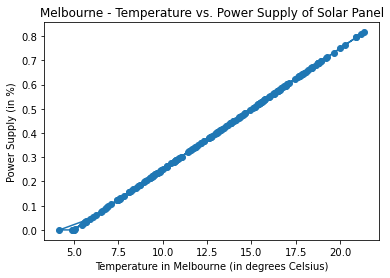

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x_points = np.array(df_fuzzy.Temp)
y_points = np.array(df_fuzzy.PowerSupply)

plt.plot(x_points, y_points, marker = 'o')

plt.title("Melbourne - Temperature vs. Power Supply of Solar Panel")
plt.xlabel("Temperature in Melbourne (in degrees Celsius)")
plt.ylabel("Power Supply (in %)")

plt.show()

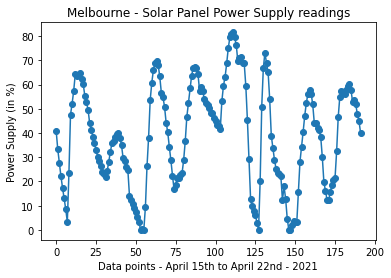

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x_points = np.array(df_fuzzy.index)            # Index is a list of points from 15th April to 22nd April
y_points = np.array(df_fuzzy.PowerSupply * 100)

plt.plot(x_points, y_points, marker = 'o')

plt.title("Melbourne - Solar Panel Power Supply readings")
plt.xlabel("Data points - April 15th to April 22nd - 2021")
plt.ylabel("Power Supply (in %)")

plt.show()

In [11]:
df_temp_hyderabad = pd.read_csv('hyderabad temp.csv')
df_temp_hyderabad.head()

,timestamp,Temp,Date
0,20210415T0000,29.212900,4/15/2021
1,20210415T0100,28.332901,4/15/2021
2,20210415T0200,27.952900,4/15/2021
3,20210415T0300,27.602900,4/15/2021
4,20210415T0400,27.252900,4/15/2021


In [12]:
df_fuzzy = df_fuzzy[0:0]
df_fuzzy = pd.DataFrame(columns=['Date', 'Temp', 'PowerSupply'])

for index, row in df_temp_hyderabad.iterrows():
    df_fuzzy.loc[index] = [row['Date'], row['Temp'], fuzzy_power(row['Temp'])]
    
df_fuzzy.head()

,Date,Temp,PowerSupply
0,4/15/2021,29.212900,0.789
1,4/15/2021,28.332901,0.833
2,4/15/2021,27.952900,0.852
3,4/15/2021,27.602900,0.870
4,4/15/2021,27.252900,0.887


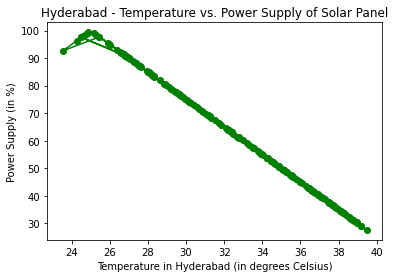

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x_points = np.array(df_fuzzy.Temp)
y_points = np.array(df_fuzzy.PowerSupply * 100)

plt.plot(x_points, y_points, marker = 'o', color='g')

plt.title("Hyderabad - Temperature vs. Power Supply of Solar Panel")
plt.xlabel("Temperature in Hyderabad (in degrees Celsius)")
plt.ylabel("Power Supply (in %)")

plt.show()

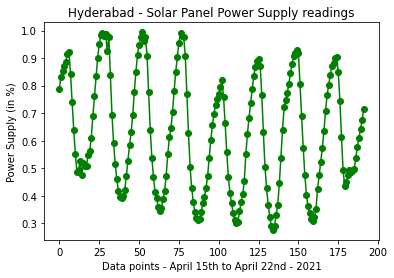

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x_points = np.array(df_fuzzy.index)            # Index is a list of points from 15th April to 22nd April
y_points = np.array(df_fuzzy.PowerSupply)

plt.plot(x_points, y_points, marker = 'o', color='g')

plt.title("Hyderabad - Solar Panel Power Supply readings")
plt.xlabel("Data points - April 15th to April 22nd - 2021")
plt.ylabel("Power Supply (in %)")

plt.show()